# Model for tiny imageNet using Keras

In [15]:
import os
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D
from PIL import Image
from keras.datasets import mnist
from keras.models import Sequential
from keras import regularizers
from keras.datasets import cifar10
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization 
from keras.utils import np_utils
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import h5py
import matplotlib.pyplot as plt

In [16]:
def get_annotations_map():
	valAnnotationsPath = 'tiny-imagenet-200/tiny-imagenet-200/val/val_annotations.txt'
	valAnnotationsFile = open(valAnnotationsPath, 'r')
	valAnnotationsContents = valAnnotationsFile.read()
	valAnnotations = {}

	for line in valAnnotationsContents.splitlines():
		pieces = line.strip().split()
		valAnnotations[pieces[0]] = pieces[1]

	return valAnnotations

In [17]:
def load_images(path,num_classes):
    #Load images
    
    print('Loading ' + str(num_classes) + ' classes')

    X_train=np.zeros([num_classes*500,3,32,32],dtype='uint8')
    y_train=np.zeros([num_classes*500], dtype='uint8')

    trainPath=path+'/train'

    print('loading training images...');

    i=0
    j=0
    annotations={}
    for sChild in os.listdir(trainPath):
        sChildPath = os.path.join(os.path.join(trainPath,sChild),'images')
        annotations[sChild]=j
        for c in os.listdir(sChildPath):
            X=np.array(Image.open(os.path.join(sChildPath,c)))
            if len(np.shape(X))==2:
                X_train[i]=np.array([X,X,X])
            else:
                X_train[i]=np.transpose(X,(2,0,1))
            y_train[i]=j
            i+=1
        j+=1
        if (j >= num_classes):
            break

    print('finished loading training images')

    val_annotations_map = get_annotations_map()

    X_test = np.zeros([num_classes*50,3,32,32],dtype='uint8')
    y_test = np.zeros([num_classes*50], dtype='uint8')


    print('loading test images...')

    i = 0
    testPath=path+'/val/images'
    for sChild in os.listdir(testPath):
        if val_annotations_map[sChild] in annotations.keys():
            sChildPath = os.path.join(testPath, sChild)
            X=np.array(Image.open(sChildPath))
            if len(np.shape(X))==2:
                X_test[i]=np.array([X,X,X])
            else:
                X_test[i]=np.transpose(X,(2,0,1))
            y_test[i]=annotations[val_annotations_map[sChild]]
            i+=1
        else:
            pass



    return X_train,y_train,X_test,y_test

In [6]:
# from google.colab import files
# uploaded=files.upload()


Saving tiny-imagenet-200.zip to tiny-imagenet-200 (3).zip


In [0]:
# import zipfile
# import io
# data = zipfile.ZipFile(io.BytesIO(uploaded['tiny-imagenet-200.zip']), 'r')
# data.extractall()


In [5]:
train_data_dir = 'tiny-imagenet-200/tiny-imagenet-200/train'  
validation_data_dir = 'tiny-imagenet-200/tiny-imagenet-200/val'  
test_data_dir = 'tiny-imagenet-200//tiny-imagenet-200test' 
target_names = [item for item in os.listdir(train_data_dir) if os.path.isdir(os.path.join(train_data_dir, item))]
nb_train_samples = sum([len(files) for _, _, files in os.walk(train_data_dir)])  
nb_validation_samples = sum([len(files) for _, _, files in os.walk(validation_data_dir)])
nb_test_samples = sum([len(files) for _, _, files in os.walk(test_data_dir)])
total_nb_samples = nb_train_samples + nb_validation_samples + nb_test_samples

nb_classes = len(target_names)      # number of output classes

print('Training a CNN Multi-Classifier Model ......')
print('\n - names of classes: ', target_names, '\n - # of classes: ', nb_classes)
print(' - # of trained samples: ', nb_train_samples, '\n - # of validation samples: ', nb_validation_samples,
      '\n - # of test samples: ', nb_test_samples,
       '\n - total # of samples: ', total_nb_samples, '\n - train ratio:', round(nb_train_samples/total_nb_samples*100, 2),
      '\n - validation ratio:', round(nb_validation_samples/total_nb_samples*100, 2),
      '\n - test ratio:', round(nb_test_samples/total_nb_samples*100, 2),
     ' %', '\n - # of epochs: ', 2, '\n - batch size: ', 500)

Training a CNN Multi-Classifier Model ......

 - names of classes:  ['n01443537', 'n01629819', 'n01641577', 'n01644900', 'n01698640', 'n01742172', 'n01768244', 'n01770393', 'n01774384', 'n01774750', 'n01784675', 'n01855672', 'n01882714', 'n01910747', 'n01917289', 'n01944390', 'n01945685', 'n01950731', 'n01983481', 'n01984695', 'n02002724', 'n02056570', 'n02058221', 'n02074367', 'n02085620', 'n02094433', 'n02099601', 'n02099712', 'n02106662', 'n02113799', 'n02123045', 'n02123394', 'n02124075', 'n02125311', 'n02129165', 'n02132136', 'n02165456', 'n02190166', 'n02206856', 'n02226429', 'n02231487', 'n02233338', 'n02236044', 'n02268443', 'n02279972', 'n02281406', 'n02321529', 'n02364673', 'n02395406', 'n02403003', 'n02410509', 'n02415577', 'n02423022', 'n02437312', 'n02480495', 'n02481823', 'n02486410', 'n02504458', 'n02509815', 'n02666196', 'n02669723', 'n02699494', 'n02730930', 'n02769748', 'n02788148', 'n02791270', 'n02793495', 'n02795169', 'n02802426', 'n02808440', 'n02814533', 'n028148

In [40]:
path='tiny-imagenet-200/tiny-imagenet-200'
X_train,y_train,X_test,y_test=load_images(path,nb_classes)

Loading 200 classes
loading training images...
finished loading training images
loading test images...


In [7]:
X_train.shape

(100000, 3, 32, 32)

In [19]:
y_train = keras.utils.to_categorical(y_train, nb_classes)
y_test = keras.utils.to_categorical(y_test, nb_classes)

In [56]:
#     model = Sequential()
#     #conv-spatial batch norm - relu #1 
#     model.add(ZeroPadding2D((2,2),input_shape=(3,32,32)))
#     model.add(Convolution2D(32,5,5,subsample=(2,2)))
    
#     model.add(Activation('elu')) 

#     #conv-spatial batch norm - relu #2
#     model.add(ZeroPadding2D((1,1)))
#     model.add(Convolution2D(32,3,3,subsample=(1,1)))
    
#     model.add(Activation('elu')) 

#     #conv-spatial batch norm - relu #3
#     model.add(ZeroPadding2D((1,1)))
#     model.add(Convolution2D(128,3,3,subsample=(2,2)))
    
#     model.add(Activation('elu')) 
#     model.add(Dropout(0.25)) 

#     #conv-spatial batch norm - relu #4
#     model.add(ZeroPadding2D((1,1)))
#     model.add(Convolution2D(128,3,3,subsample=(1,1)))
    
#     model.add(Activation('relu')) 

#     #conv-spatial batch norm - relu #5
#     model.add(ZeroPadding2D((1,1)))
#     model.add(Convolution2D(256,3,3,subsample=(2,2)))
    
#     model.add(Activation('relu')) 

#     #conv-spatial batch norm - relu #6
#     model.add(ZeroPadding2D((1,1)))
#     model.add(Convolution2D(256,3,3,subsample=(1,1)))
    
#     model.add(Activation('relu')) 
#     model.add(Dropout(0.25))

#     #conv-spatial batch norm - relu #7
#     model.add(ZeroPadding2D((1,1)))
#     model.add(Convolution2D(512,3,3,subsample=(2,2)))
    
#     model.add(Activation('relu')) 

#     #conv-spatial batch norm - relu #8
#     model.add(ZeroPadding2D((1,1)))
#     model.add(Convolution2D(512,3,3,subsample=(1,1)))
    
#     model.add(Activation('relu')) 
    

#     #conv-spatial batch norm - relu #9
#     model.add(ZeroPadding2D((1,1)))
#     model.add(Convolution2D(1024,3,3,subsample=(2,2)))
    
#     model.add(Activation('relu'))
#     model.add(Dropout(0.25)) 

#     #Affine-spatial batch norm -relu #10 
#     model.add(Flatten())
#     model.add(Dense(512))
#     model.add(Dense(nb_classes, activation='softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), strides=(2, 2))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), strides=(1, 1))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), strides=(2, 2))`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), strides=(1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), strides=(2, 2))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWa

In [21]:
model = Sequential()
model.add(Conv2D(32, (6, 6), padding='same',input_shape=(3, 32, 32), activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (4, 4), padding='same', activation='relu'))
model.add(Conv2D(64, (4, 4), padding='same', activation='relu'))
#model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(64, (4 , 4), padding='same', activation='relu'))
model.add(Conv2D(128, (4 , 4), padding='same', activation='relu'))
#model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))

model.add(Dropout(0.3))
model.add(Dense(nb_classes,activation='softmax'))

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 3, 32, 32)         36896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 3, 32, 32)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 32, 32)         16416     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 16, 32)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 1, 16, 64)         32832     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 1, 16, 64)         65600     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 1, 16, 64)         65600     
__________

In [37]:
lr= 0.01
batch_size=128
epochs=15
#decay = lr/epochs
opt = keras.optimizers.SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True)


In [38]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [39]:
history=model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_test, y_test),
              shuffle=True)

Train on 100000 samples, validate on 10000 samples
Epoch 1/15
100000/100000 [==============================] - 123s 1ms/step - loss: 5.2988 - acc: 0.0047 - val_loss: 5.2984 - val_acc: 0.0050
Epoch 2/15
100000/100000 [==============================] - 123s 1ms/step - loss: 5.2987 - acc: 0.0046 - val_loss: 5.2983 - val_acc: 0.0050
Epoch 3/15
100000/100000 [==============================] - 124s 1ms/step - loss: 5.2987 - acc: 0.0043 - val_loss: 5.2983 - val_acc: 0.0050
Epoch 4/15
100000/100000 [==============================] - 123s 1ms/step - loss: 5.2987 - acc: 0.0047 - val_loss: 5.2983 - val_acc: 0.0050
Epoch 5/15
100000/100000 [==============================] - 123s 1ms/step - loss: 5.2987 - acc: 0.0045 - val_loss: 5.2983 - val_acc: 0.0050
Epoch 6/15
100000/100000 [==============================] - 124s 1ms/step - loss: 5.2987 - acc: 0.0038 - val_loss: 5.2983 - val_acc: 0.0050
Epoch 7/15
100000/100000 [==============================] - 124s 1ms/step - loss: 5.2987 - acc: 0.0045 - val_

In [32]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 4s 394us/step
Test loss: 5.300190341186523
Test accuracy: 0.005


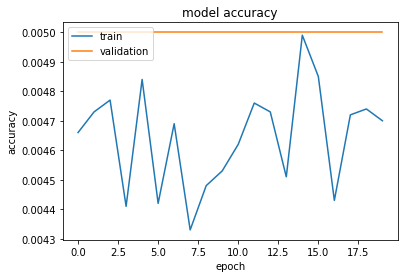

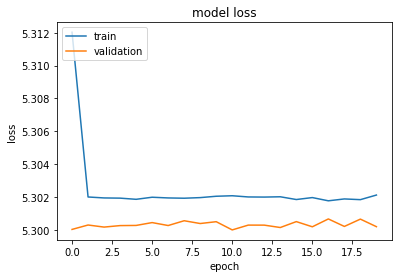

In [33]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()